# Mesure du temps d'exécution

Pour chaque algorithme, on souhaite estimer la complexité en temps de calcul. Pour cela, on évalue le temps que met chaque algorithme à trier des tableaux de valeurs aléatoires. On fait varier la taille du problème en faisant varier la taille du tableau (ie. le nombre d'éléments à trier). Pour chaque taille de tableau, on effectue 20 tirages de tableaux aléatoire et on calcule la moyenne des temps de tri sur les 20 exécutions.

Les tailles des tableaux sont fixées à [0, 10, 50, 100, 150, 200, 500, 750,1000, 1250, 1500, 1750, 2000].

**Remarque :** Le dictionnaire `algorithmes` contient le nom de tous les algorithmes de tri à comparer. La valeur booléenne associée à chaque tri indique s'il faut le prendre en compte dans la comparaison. Les algorithmes n'étant pas implémentés au début (sauf pour le tri rapide qui est le tri par défaut de python), les valeurs associées sont à `False`. Une fois que vous avez écrit la fonction de tri associée, vous devez mettre la valeur `True` dans le dictionnaire `algorithmes` pour le prendre en compte dans la comparaison.


In [5]:
from matplotlib.pyplot import plot, show, legend, xlabel, ylabel
from time import time
import Tri.utils as utils
import Tri.tris as tri

In [9]:
# Algorithmes de tri à comparer
algorithmes = {
    "selection": True,
    "insertion": True,
    "bulle": True,
    "comptage": True,
    "rapide": True
}

# Nombre de tirages pour une taille donnée
nombre_tirages = 20

tailles_tableau = [
    0, 10, 50, 100, 150, 200, 500, 750, 1000, 1250, 1500, 1750, 2000
]

# Dictionnaire contenant pour chaque tri un tableau
# contenant les temps moyens pour les différentes tailles de tailles_tableau
temps_moyen = {}

i = 0
liste_algos = list(algorithmes)
while i < len(liste_algos):
    n_algo = liste_algos[i]
    if algorithmes[n_algo]:  # Si l'algorithme est à True
        temps_moyen[n_algo] = utils.tab_init(len(tailles_tableau), 0)
    i += 1

taille = 0
# Pour chaque taille de tableau à tester
while taille < len(tailles_tableau):

    # Pour chaque tirage
    tirage = 0
    while tirage < nombre_tirages:
        tab_ref = utils.tab_alea(tailles_tableau[taille])

        # -----------------------------------------------------
        # -----------------       tri selection
        # -----------------------------------------------------
        if algorithmes["selection"]:
            tab = tab_ref.copy()
            t_debut = time()
            tri.tri_selection(tab)
            temps_moyen["selection"][taille] += 1000 * (time() - t_debut)

        # -----------------------------------------------------
        # -----------------       tri insertion
        # -----------------------------------------------------
        if algorithmes["insertion"]:
            tab = tab_ref.copy()
            t_debut = time()
            tri.tri_insertion(tab)
            temps_moyen["insertion"][taille] += 1000 * (time() - t_debut)

        # -----------------------------------------------------
        # -----------------       tri bulle
        # -----------------------------------------------------
        if algorithmes["bulle"]:
            tab = tab_ref.copy()
            t_debut = time()
            tri.tri_bulle(tab)
            temps_moyen["bulle"][taille] += 1000 * (time() - t_debut)

        # -----------------------------------------------------
        # -----------------       tri comptage
        # -----------------------------------------------------
        if algorithmes["comptage"]:
            tab = tab_ref.copy()
            t_debut = time()
            tri.tri_comptage(tab)
            temps_moyen["comptage"][taille] += 1000 * (time() - t_debut)

        # -----------------------------------------------------
        # -----------------       tri quicksort de python
        # -----------------------------------------------------
        if algorithmes["rapide"]:
            tab = tab_ref.copy()
            t_debut = time()
            tab.sort()
            temps_moyen["rapide"][taille] += 1000 * (time() - t_debut)

        tirage += 1

    # On divise le temps mesuré pour chaque algorithme par nombre_tirages pour avoir une moyenne
    algoCompares = list(temps_moyen)
    i = 0
    while i < len(algoCompares):
        temps_moyen[algoCompares[i]][taille] /= nombre_tirages
        i += 1

    taille += 1

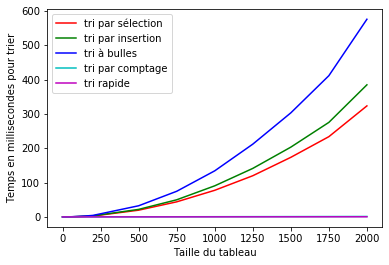

In [10]:
%matplotlib inline

# Figure affichant les temps d'exécution en fonction de la taille du tableau

if algorithmes["selection"]:
    plot(tailles_tableau, temps_moyen["selection"], "r", label="tri par sélection")

if algorithmes["insertion"]:
    plot(tailles_tableau, temps_moyen["insertion"], "g", label="tri par insertion")

if algorithmes["bulle"]:    
    plot(tailles_tableau, temps_moyen["bulle"], "b", label="tri à bulles")

if algorithmes["comptage"]:
    plot(tailles_tableau, temps_moyen["comptage"], "c", label="tri par comptage")

if algorithmes["rapide"]:
    plot(tailles_tableau, temps_moyen["rapide"], "m", label="tri rapide")
    
xlabel("Taille du tableau")
ylabel("Temps en millisecondes pour trier")
legend();